In [ ]:
# 组件依赖，只需要执行一次
%pip install -r requirements.txt

In [4]:
# conda
# %conda install numpy scipy h5py Pillow Click Flask itsdangerous Jinja2 MarkupSafe Werkzeug tensorflow
%pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 环境参数，有时候会抽风
!source ./env

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model, load_model
import matplotlib.pyplot as plt
from PIL import Image

img_width = 398
img_height = 398
final_model_path = "models/final_model_033.h5"
class_dictionary_path= "models/class_indices_033.npy"
model = load_model(final_model_path)
class_dictionary = np.load(class_dictionary_path, allow_pickle=True).item()


2023-03-13 20:58:59.365298: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-03-13 20:59:00.070692: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-03-13 20:59:00.093369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-13 20:59:00.093443: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.777GHz coreCount: 28 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 335.32GiB/s
2023-03-13 20:59:00.093453: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-03-13 20:59:00.103473: I tensorflow/stream_executor/

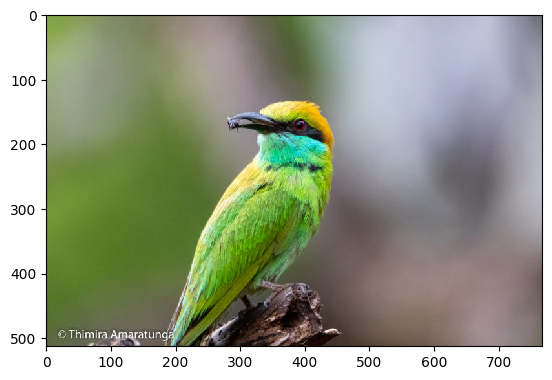

2023-03-13 20:59:06.619953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-03-13 20:59:06.639043: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2112000000 Hz


[Info] Predicted: Green Bee-eater, Confidence: 0.9999668598175049


In [3]:
imageFile = load_img("./uploads/54de3d3bc2b24351b2c7b878d2d04128.jpg", target_size=(
    img_width, img_height), interpolation='lanczos')

# 显示要识别的图片
img = Image.open("./uploads/54de3d3bc2b24351b2c7b878d2d04128.jpg")
plt.figure('image')
plt.imshow(img)
plt.show()

image = img_to_array(imageFile)
# perform the ImageNet mean subtraction
# mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
# image -= mean

# important! otherwise the predictions will be '0'
image = image / 255.0

# add a new axis to make the image array confirm with
# the (samples, height, width, depth) structure
image = np.expand_dims(image, axis=0)

# get the probabilities for the prediction
# with graph.as_default():
probabilities = model.predict(image)

prediction_probability = probabilities[0, probabilities.argmax(axis=1)][0]

class_predicted = np.argmax(probabilities, axis=1)

inID = class_predicted[0]

# invert the class dictionary in order to get the label for the id
inv_map = {v: k for k, v in class_dictionary.items()}
label = inv_map[inID]

print("[Info] Predicted: {}, Confidence: {}".format(
    label, prediction_probability))
